**A1: Stacking Classifier**

Stacking Classifier Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00       181
      Fluent       1.00      1.00      1.00        21
        Poor       1.00      1.00      1.00       324

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526



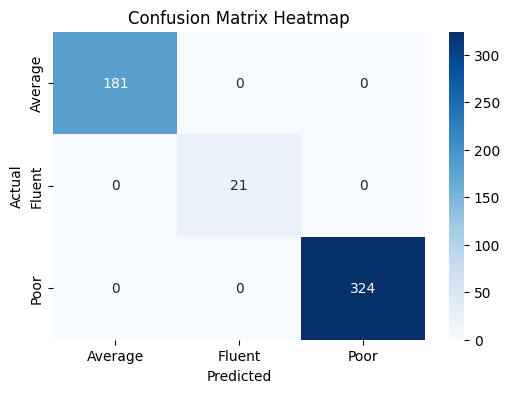

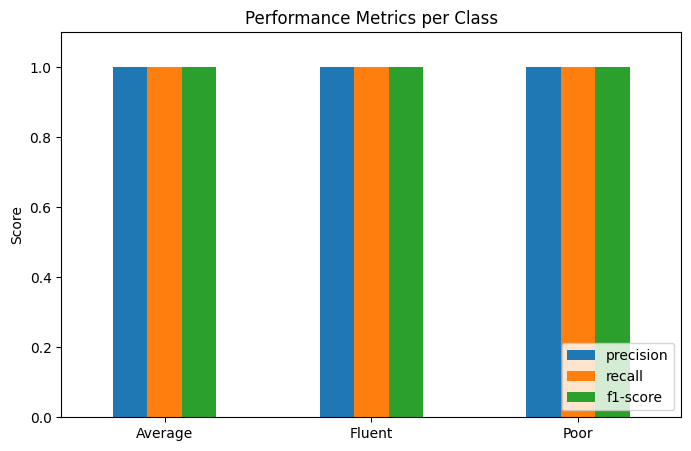

In [3]:
# A1: Stacking Classifier with Evaluation + Heatmap + Bar Plot

import pandas as pd  # for data handling
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for heatmap visualization
from sklearn.model_selection import train_test_split  # for train-test split
from sklearn.preprocessing import LabelEncoder  # for encoding target labels
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier  # classifiers
from sklearn.linear_model import LogisticRegression  # meta-model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # evaluation metrics

# Load dataset
fluency_df = pd.read_csv("processed_fluency_dataset.csv")  # load dataset into DataFrame

# Prepare features and target
X_features = fluency_df.drop(columns=["fluency"])  # drop target column from features
X_features = X_features.select_dtypes(include=['number'])  # keep only numeric features
label_enc = LabelEncoder()  # initialize label encoder
y_target = label_enc.fit_transform(fluency_df["fluency"])  # encode target labels into numbers

# Split data into train and test
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42
)  # split dataset into 80% train and 20% test

# Define base models for stacking
base_estimators = [
    ('rf_model', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest base model
    ('gb_model', GradientBoostingClassifier(random_state=42))  # Gradient Boosting base model
]

# Define stacking classifier with Logistic Regression as final estimator
stack_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())  # stacking model

# Train stacking model
stack_clf.fit(X_train_set, y_train_set)  # fit stacking model on training data

# Make predictions
y_predicted = stack_clf.predict(X_test_set)  # predict labels for test data

# Evaluation
print("Stacking Classifier Accuracy:", accuracy_score(y_test_set, y_predicted))  # print accuracy score
print("\nClassification Report:\n", classification_report(y_test_set, y_predicted, target_names=label_enc.classes_))  # print classification report

# Visualization 1: Confusion Matrix Heatmap
plt.figure(figsize=(6,4))  # set figure size
sns.heatmap(confusion_matrix(y_test_set, y_predicted), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)  # draw heatmap
plt.title("Confusion Matrix Heatmap")  # set plot title
plt.xlabel("Predicted")  # x-axis label
plt.ylabel("Actual")  # y-axis label
plt.show()  # display plot

# Visualization 2: Classification Report as Bar Plot
clf_report = classification_report(y_test_set, y_predicted, target_names=label_enc.classes_, output_dict=True)  # get classification report as dict
clf_report_df = pd.DataFrame(clf_report).transpose()  # convert dict to DataFrame

# Select only per-class precision, recall, and F1-score
class_metrics = clf_report_df.loc[label_enc.classes_, ["precision", "recall", "f1-score"]]  # filter class metrics

# Plot bar chart
class_metrics.plot(kind="bar", figsize=(8,5))  # draw bar chart
plt.title("Performance Metrics per Class")  # set plot title
plt.ylabel("Score")  # y-axis label
plt.ylim(0, 1.1)  # set y-axis range from 0 to 1.1
plt.xticks(rotation=0)  # keep x labels horizontal
plt.legend(loc="lower right")  # place legend at bottom-right
plt.show()  # display bar chart


**A2: Pipeline for Preprocessing + Classification**

Pipeline Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00       181
      Fluent       1.00      1.00      1.00        21
        Poor       1.00      1.00      1.00       324

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526



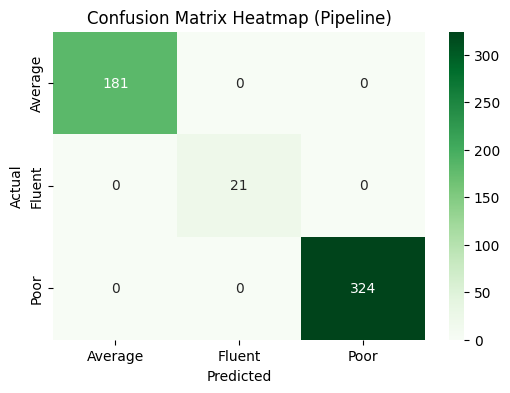

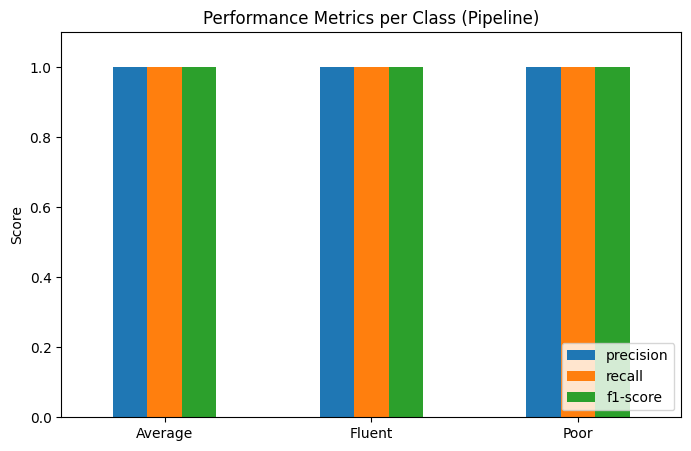

In [4]:
# A2: Pipeline with Scaling, Classification, and Evaluation (Cleaned)

import pandas as pd  # for data handling
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for heatmap visualization
from sklearn.model_selection import train_test_split  # for train-test split
from sklearn.preprocessing import StandardScaler, LabelEncoder  # for scaling and encoding
from sklearn.pipeline import Pipeline  # for pipeline creation
from sklearn.ensemble import RandomForestClassifier  # classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # evaluation metrics

# Load dataset
fluency_df = pd.read_csv("processed_fluency_dataset.csv")  # load dataset into DataFrame

# Prepare features and target
X_inputs = fluency_df.drop(columns=["fluency"])  # drop target column from features
X_inputs = X_inputs.select_dtypes(include=['number'])  # keep only numeric features
target_encoder = LabelEncoder()  # initialize label encoder
y_labels = target_encoder.fit_transform(fluency_df["fluency"])  # encode target labels into numbers

# Split dataset
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    X_inputs, y_labels, test_size=0.2, random_state=42
)  # split dataset into 80% train and 20% test

# Create pipeline with preprocessing and classifier
clf_pipeline = Pipeline([
    ('scaler_step', StandardScaler()),  # step 1: scale features
    ('rf_classifier', RandomForestClassifier(random_state=42))  # step 2: random forest classifier
])

# Train pipeline
clf_pipeline.fit(X_train_set, y_train_set)  # fit pipeline on training data

# Make predictions
y_predicted = clf_pipeline.predict(X_test_set)  # predict labels for test data

# Evaluation
print("Pipeline Accuracy:", accuracy_score(y_test_set, y_predicted))  # print accuracy
print("\nClassification Report:\n", classification_report(y_test_set, y_predicted, target_names=target_encoder.classes_))  # print classification report

# Visualization 1: Confusion Matrix Heatmap
plt.figure(figsize=(6,4))  # set figure size
sns.heatmap(confusion_matrix(y_test_set, y_predicted), annot=True, fmt="d", cmap="Greens",
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)  # draw heatmap
plt.title("Confusion Matrix Heatmap (Pipeline)")  # set title
plt.xlabel("Predicted")  # x-axis label
plt.ylabel("Actual")  # y-axis label
plt.show()  # display heatmap

# Visualization 2: Bar Plot of Metrics
clf_report = classification_report(y_test_set, y_predicted, target_names=target_encoder.classes_, output_dict=True)  # get report as dictionary
clf_report_df = pd.DataFrame(clf_report).transpose()  # convert dict to DataFrame
class_scores = clf_report_df.loc[target_encoder.classes_, ["precision", "recall", "f1-score"]]  # select per-class metrics

# Plot bar chart
class_scores.plot(kind="bar", figsize=(8,5))  # draw bar plot
plt.title("Performance Metrics per Class (Pipeline)")  # set title
plt.ylabel("Score")  # y-axis label
plt.ylim(0, 1.1)  # set range 0–1.1
plt.xticks(rotation=0)  # keep labels horizontal
plt.legend(loc="lower right")  # place legend at bottom right
plt.show()  # display bar chart

**A3: LIME Explanation of Pipeline**


Sample 0 - True Label: Poor


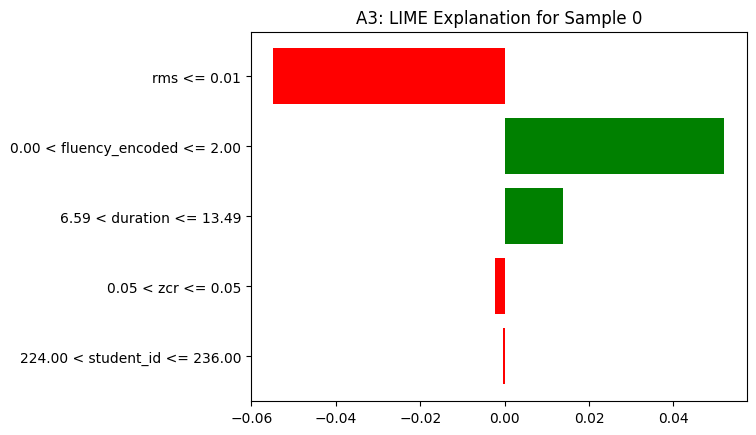

Top Contributing Features:
                           Feature  Contribution
0                     rms <= 0.01     -0.054811
1  0.00 < fluency_encoded <= 2.00      0.052017
2        6.59 < duration <= 13.49      0.013829
3              0.05 < zcr <= 0.05     -0.002300
4   224.00 < student_id <= 236.00     -0.000302

Sample 1 - True Label: Poor


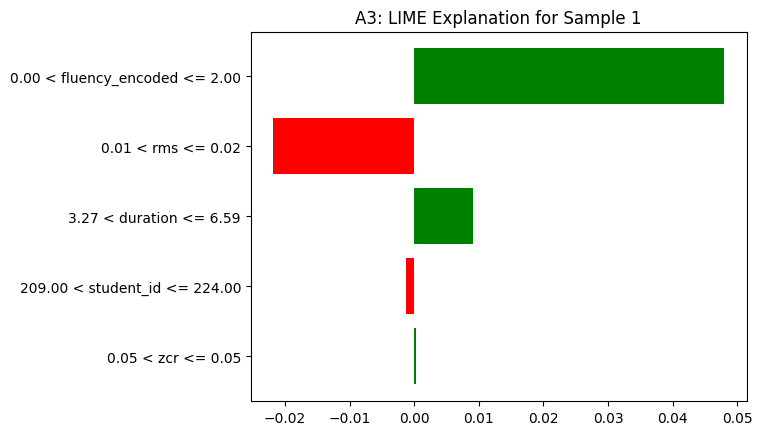

Top Contributing Features:
                           Feature  Contribution
0  0.00 < fluency_encoded <= 2.00      0.047976
1              0.01 < rms <= 0.02     -0.021821
2         3.27 < duration <= 6.59      0.009156
3   209.00 < student_id <= 224.00     -0.001240
4              0.05 < zcr <= 0.05      0.000285

Sample 2 - True Label: Average


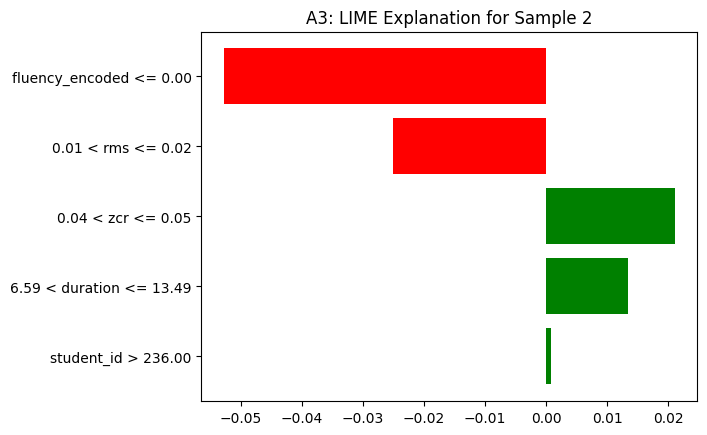

Top Contributing Features:
                     Feature  Contribution
0   fluency_encoded <= 0.00     -0.052810
1        0.01 < rms <= 0.02     -0.025081
2        0.04 < zcr <= 0.05      0.021069
3  6.59 < duration <= 13.49      0.013480
4       student_id > 236.00      0.000726

Sample 3 - True Label: Average


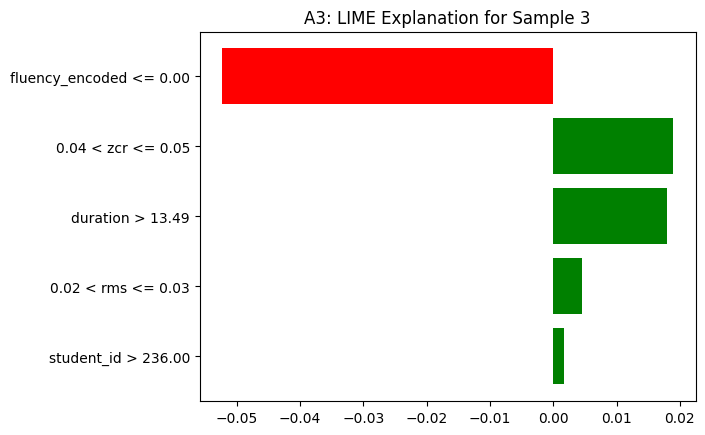

Top Contributing Features:
                    Feature  Contribution
0  fluency_encoded <= 0.00     -0.052278
1       0.04 < zcr <= 0.05      0.018941
2         duration > 13.49      0.017915
3       0.02 < rms <= 0.03      0.004545
4      student_id > 236.00      0.001694

Sample 4 - True Label: Fluent


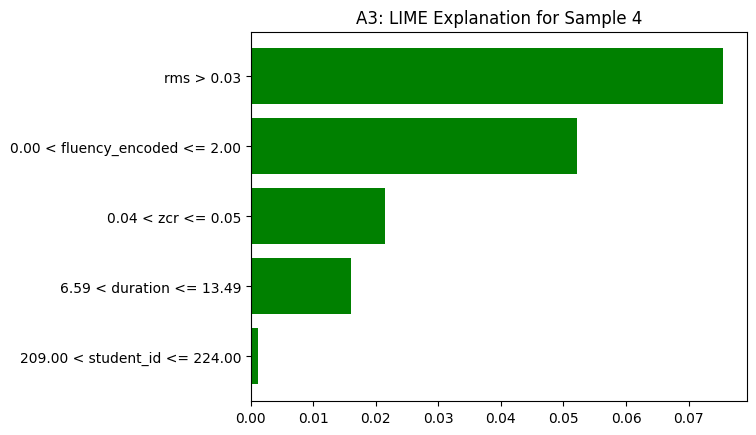

Top Contributing Features:
                           Feature  Contribution
0                      rms > 0.03      0.075519
1  0.00 < fluency_encoded <= 2.00      0.052191
2              0.04 < zcr <= 0.05      0.021456
3        6.59 < duration <= 13.49      0.015955
4   209.00 < student_id <= 224.00      0.001150


In [11]:
# Install LIME (only once in Colab)
!pip install lime

# Imports
import lime  # library for local explanations
import lime.lime_tabular  # tabular explainer
import numpy as np  # numerical operations
import pandas as pd  # dataframe handling
import matplotlib.pyplot as plt  # plotting
from sklearn.model_selection import train_test_split  # train-test split
from sklearn.preprocessing import StandardScaler, LabelEncoder  # scaling and encoding
from sklearn.pipeline import Pipeline  # pipeline creation
from sklearn.ensemble import RandomForestClassifier  # classifier

# Load dataset
fluency_df = pd.read_csv("processed_fluency_dataset.csv")  # load dataset
X_inputs = fluency_df.drop(columns=["fluency"])  # drop target column
X_inputs = X_inputs.select_dtypes(include=['number'])  # keep numeric features only
target_encoder = LabelEncoder()  # initialize label encoder
y_labels = target_encoder.fit_transform(fluency_df["fluency"])  # encode target labels

# Train-test split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(
    X_inputs, y_labels, test_size=0.2, random_state=42
)  # 80% train, 20% test

# Build pipeline model
pipeline_model = Pipeline([
    ('scaler_step', StandardScaler()),  # step 1: scale features
    ('rf_classifier', RandomForestClassifier(random_state=42))  # step 2: random forest classifier
])
pipeline_model.fit(X_train_data, y_train_data)  # train pipeline

# Define class names
fluency_class_labels = target_encoder.classes_.tolist()  # get decoded class names

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_data),  # training data (numpy array)
    feature_names=X_train_data.columns.tolist(),  # feature names
    class_names=fluency_class_labels,  # class labels
    mode='classification'  # classification task
)

# Wrapper to fix feature name warning
def pipeline_predict_proba(input_array):
    input_df = pd.DataFrame(input_array, columns=X_train_data.columns)  # restore feature names
    return pipeline_model.predict_proba(input_df)  # predict probabilities

# Explain multiple samples
num_test_samples = 5  # number of test samples to explain

for sample_idx in range(num_test_samples):
    # Select sample
    test_sample_features = X_test_data.iloc[sample_idx].values.reshape(1, -1)  # extract one sample
    true_class_label = y_test_data[sample_idx]  # numeric true label
    true_class_name = target_encoder.inverse_transform([true_class_label])[0]  # decode to string

    # Generate explanation
    lime_explanation = lime_explainer.explain_instance(
        data_row=test_sample_features[0],  # sample row
        predict_fn=pipeline_predict_proba  # wrapper avoids warning
    )

    # Print label info
    print(f"\nSample {sample_idx} - True Label: {true_class_name}")

    # Plot explanation
    explanation_fig = lime_explanation.as_pyplot_figure()  # convert to matplotlib figure
    plt.title(f"A3: LIME Explanation for Sample {sample_idx}")  # set title
    plt.show()  # display plot

    # Show contributing features table
    feature_importances = lime_explanation.as_list()  # get feature contributions
    feature_table = pd.DataFrame(feature_importances, columns=["Feature", "Contribution"])  # make dataframe
    print("Top Contributing Features:\n", feature_table)  # print table